<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/Thesis/blob/master/3_Taheri_Thesis_8_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [2]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
from bs4 import BeautifulSoup
### ML Librarires--------------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
###-------------------------------------------
from keras.utils.vis_utils import plot_model
np.random.seed(42)
import string, spacy,unicodedata, random
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings
# main_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/"
# models_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/"
# results_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Results/"
# memes_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/"

main_path = "/Users/zaima/Desktop/Dataset/"
models_path = "/Users/zaima/Desktop/Dataset/Multimodal Sentiment/Models_Memosen/"
results_path = "/Users/zaima/Desktop/Dataset/Multimodal Sentiment/Results_Memosen/"
memes_path = "/Users/zaima/Desktop/Dataset/Images/"

CPU times: user 4.97 s, sys: 1.01 s, total: 5.98 s
Wall time: 8.68 s


In [3]:
from keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import DenseNet121
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, GlobalAveragePooling2D, Embedding, LSTM, multiply
from keras.models import Model
from keras import preprocessing, Input
from tensorflow import keras
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras.models import load_model
import itertools
from PIL import Image, ImageFile
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten, Reshape, Permute
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D,MaxPooling1D,Conv1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Nadam
keras.backend.clear_session()

#Dataset Fetching (New)

In [24]:
# dataset = pd.read_csv(main_path+'train.csv')

from sklearn.model_selection import train_test_split

# train_data = pd.read_csv(main_path+'trainA.csv')

# train_data,test_data  = train_test_split(train_data, random_state=0, train_size = 0.90)
# valid_data = pd.read_excel(main_path+'valid_new.xlsx')
# test_data = pd.read_csv(main_path+'test.csv')

train_data = pd.read_csv(main_path+'train.csv')
valid_data = pd.read_csv(main_path+'val.csv')
test_data = pd.read_csv(main_path+'test.csv')


In [25]:
train_data

,image_name,Captions,Label_Sentiment,Label
0,78.jpg,প্রথমবারের মতো বাড়ি যাওয়ার পথে কুকুরকে আশ্রয...,other,6
1,105.jpg,একটি ফোরামে টেকওভার নিয়ে আলোচনা করার জন্য এবং...,other,6
2,114.jpg,আইনে বিবাহের সাথে সমকামী অংশীদারিত্বকে উন্নত ক...,other,6
3,117.jpg,ব্রিটিশ উপকূলে ক্লাস্টারগুলিতে পপ আপ করা অনেক ...,other,6
4,138.jpg,তারা দেখা ...,other,6
...,...,...,...,...
3999,4676.jpg,অভিনন্দন ২ প্রথম আইবিএম প্যাথওয়েসটেক পণ্ডিতরা...,happy,0
4000,4677.jpg,সবেমাত্র আমার চুলের সাথে রুটোশায়ার স্ক্যাল্প ...,happy,0
4001,4678.jpg,সবেমাত্র এই ওক ড্রেসারটি শেষ করেছেন।,happy,0
4002,4682.jpg,সুগারম্যান রজার্স মামলা-মোকদ্দমা কেমব্রিজে গত ...,happy,0


In [26]:
test_data

,image_name,Captions,Label_Sentiment,Label
0,320317202_537621854944168_6032776849847162554_...,প্রথমার্ধ শেষে ফলাফলঃ মরক্কো-০ ফ্রান্স-১\nশেষম...,other,6
1,317322416_1759653367740943_20597234056714050_n...,০১/১২/২২...,other,6
2,289239858_4926163004156714_2236674541218502294...,হে আল্লাহ\nমাজলুম সকল উলামায়ে কেরামের\nদ্রুত ম...,other,6
3,60339634_3095720303773244_3667926040996478977_...,এই গরমে যেটা আমি করতে চাই।,other,6
4,2386.jpg,আমি হাই স্কুল থেকে আমার পুরানো টুকরা পেয়েছি !...,surprise,6
...,...,...,...,...
409,289375493_4921221681317513_6416435812427723496...,এমন নিভৃতচারী প্রতিটি ডোনার এক একজন সুপার হিরো ❤,happy,0
410,289191110_4917175091722172_2439210022385464357...,অফুরন্ত ভালোবাসা 🥰🖤,happy,0
411,289156396_4926324857473862_2729921420349851184...,তাশরিফের ২৪ ঘন্টায় সংগ্রহ এক কোটি টাকার বেশি। ...,happy,0
412,289017539_4921398891299792_4839462300728528907...,আলহামদুলিল্লাহ সিলেটবাসির জন্য\n( ৮৪১৫০) টাকা ...,happy,0


In [27]:
# print("Number of Training Data: ", len(dataset))
print("Number of Training Data: ", len(train_data))
# print("Number of validation Data: ", len(valid_data))
print("Number of Test Data: ", len(test_data))

Number of Training Data:  4004
Number of Test Data:  414


In [28]:
## Replace Names
train_data['enc_label'] = train_data['Label_Sentiment'].replace({'happy':0,'angry':1,'disgust':2,'fear':3,'sad':4,'surprise':5,'other':6})
valid_data['enc_label'] = valid_data['Label_Sentiment'].replace({'happy':0,'angry':1,'disgust':2,'fear':3,'sad':4,'surprise':5,'other':6})
test_data['enc_label'] = test_data['Label_Sentiment'].replace({'happy':0,'angry':1,'disgust':2,'fear':3,'sad':4,'surprise':5,'other':6})
# train_data['enc_label'] = train_data['Label']
# valid_data['enc_label'] = valid_data['Label']
# test_data['enc_label'] = test_data['Label']

In [29]:
len(train_data)

4004

In [30]:
## collect image names from the folders
def create_img_array(img_dirct):
    all_imgs = []
    for root, j, files in os.walk(img_dirct):
        for file in files:
            file = root + '' + file
            all_imgs.append(file)
    return all_imgs

def create_img_path(DF, Col_name, img_dir):
    img_path = [img_dir + '' + name for name in DF[Col_name]]
    return img_path


In [31]:
# Function that returns image reading from the path
def get_input(path):
    # Loading image from given path
    # and resizing it to 150*150*3 format
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    img = tf.keras.utils.load_img(path, target_size=(150,150))    
    return(img)

# Takes in image and preprocess it
def process_input(img):
    # Converting image to array    
    img_data = tf.keras.utils.img_to_array(img)
    # Adding one more dimension to array    
    img_data = np.expand_dims(img_data, axis=0)
    #     
    img_data = preprocess_input(img_data)
    return(img_data)


In [32]:
# img_dir = memes_path+'3300 Memes/'
img_dir = memes_path
# Creating train, test and validation image path
train_img_path = create_img_path(train_data,'image_name', img_dir)
valid_img_path = create_img_path(valid_data,'image_name', img_dir)
test_img_path = create_img_path(test_data,'image_name', img_dir)

In [33]:
# Create an array of training images
train_images = []
for i,m in enumerate(train_img_path):
  input_img = get_input(m)
  input_img = process_input(input_img)
  train_images.append(input_img[0])
  # print(i)

# convert into numpy array
train_image = np.array(train_images)
print(train_image.shape)  

(4004, 150, 150, 3)


In [34]:
import pickle as pkl
with open(main_path+'train_image_new.pkl','wb') as f:
    pkl.dump(train_image, f)

In [35]:
# Create an array of test images
test_images = []
for i,m in enumerate(test_img_path):
  input_img = get_input(m)
  input_img = process_input(input_img)
  test_images.append(input_img[0])
  # print(i)

# convert into numpy array
test_image = np.array(test_images)
print(test_image.shape)

(414, 150, 150, 3)


In [36]:
import pickle as pkl
with open(main_path+'test_image_new.pkl','wb') as f:
    pkl.dump(test_image, f)

In [37]:
# Create an array of test images
valid_images = []
for i,m in enumerate(valid_img_path):
  input_img = get_input(m)
  input_img = process_input(input_img)
  valid_images.append(input_img[0])
  # print(i)

# convert into numpy array
valid_image = np.array(valid_images)
print(valid_image.shape)

(414, 150, 150, 3)


In [38]:
import pickle as pkl
with open(main_path+'valid_image_new.pkl','wb') as f:
    pkl.dump(valid_image, f)

#Image Fetching (New)

In [39]:
import pickle as pkl

with open(main_path+'train_image_new.pkl','rb') as f:
  train_image = pkl.load(f)
  print("Training Images:-- ",train_image.shape)

with open(main_path+'valid_image_new.pkl','rb') as f:
  valid_image = pkl.load(f)
  print("Valid Images:-- ",valid_image.shape)   
 
   

Training Images:--  (4004, 150, 150, 3)
Valid Images:--  (414, 150, 150, 3)


In [40]:
with open(main_path+'test_image_new.pkl','rb') as f:
  test_image = pkl.load(f)
  print("Test Images:-- ",test_image.shape) 

Test Images:--  (414, 150, 150, 3)


#Captions Cleaning

In [41]:
stp_path = '/content/drive/MyDrive/TaheriThesis/Dataset/'
stp = open(main_path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()

In [42]:
import locale
print(locale.getpreferredencoding())

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


In [43]:
'''
Text Cleaning
'''
# import emoji
# import re

# def remove_emojis(text):
#     emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)


def text_cleaning(row):
   #to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = d.replace('\r\n', '')
  post = post.replace('—', ' ') 
  post = post.replace('।', ' ')
  text = ''.join([c for c in post if c not in string.punctuation])
#   text= remove_emojis(text)
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # # Stopword 
  # result = text.split()
  # text = [word.strip() for word in result if word not in stp ]
  # text =" ".join(text)
  
  return text

In [44]:
len(train_data)

4004

In [45]:
#Removing punctuations
train_data['cleaned'] = train_data['Captions'].apply(text_cleaning)
test_data['cleaned'] = test_data['Captions'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['Captions'].apply(text_cleaning)


## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(100):
  if i in train_data.index:
     print("Original Data:===\n",train_data.Captions[i],"\nCleaned Data:===\n",train_data.cleaned[i],)

Data samples after cleaning:

Original Data:===
 প্রথমবারের মতো বাড়ি যাওয়ার পথে কুকুরকে আশ্রয় করুন 
Cleaned Data:===
 প্রথমবারের মতো বাড়ি যাওয়ার পথে কুকুরকে আশ্রয় করুন
Original Data:===
 একটি ফোরামে টেকওভার নিয়ে আলোচনা করার জন্য এবং দু: খিত স্কুলগুলিকে সহায়তা করার ক্ষেত্রে রাষ্ট্রের আগ্রহের প্রতি শূন্য আত্মবিশ্বাসের বিষয়ে আলোচনা করার জন্য। 
Cleaned Data:===
 একটি ফোরামে টেকওভার নিয়ে আলোচনা করার জন্য এবং দু খিত স্কুলগুলিকে সহায়তা করার ক্ষেত্রে রাষ্ট্রের আগ্রহের প্রতি শূন্য আত্মবিশ্বাসের বিষয়ে আলোচনা করার জন্য
Original Data:===
 আইনে বিবাহের সাথে সমকামী অংশীদারিত্বকে উন্নত করে এমন ঐতিহ্যবাহী দলটিকে ভোট দিন এবং এর আত্মা বিক্রি করুন। 
Cleaned Data:===
 আইনে বিবাহের সাথে সমকামী অংশীদারিত্বকে উন্নত করে এমন ঐতিহ্যবাহী দলটিকে ভোট দিন এবং এর আত্মা বিক্রি করুন
Original Data:===
 ব্রিটিশ উপকূলে ক্লাস্টারগুলিতে পপ আপ করা অনেক স্ট্যাটিক কাফেলাগুলির মধ্যে কয়েকটি, যার বেশিরভাগ শীতকালে খালি থাকে। 
Cleaned Data:===
 ব্রিটিশ উপকূলে ক্লাস্টারগুলিতে পপ আপ করা অনেক স্ট্যাটিক কাফেলাগুলির মধ্যে 

In [46]:
len(train_data)

4004

#One Hot Encoding

In [47]:
# encoder=OneHotEncoder(sparse=False)

# encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['Label_Sentiment']]))

# encoded_labels.columns = encoder.get_feature_names_out(['Label_Sentiment'])

# train_data= pd.concat([train_data, encoded_labels ], axis=1)

import pandas as pd

# Define the list of categories for your Label_Sentiment variable
categories = ['happy', 'angry', 'disgust', 'fear', 'sad', 'surprise', 'other']

# Perform one-hot encoding using get_dummies() function
encoded_labels = pd.get_dummies(train_data['Label_Sentiment'], columns=categories, prefix='Label_Sentiment')
valid_encoded_labels = pd.get_dummies(valid_data['Label_Sentiment'], columns=categories, prefix='Label_Sentiment')

# Concatenate the encoded labels with your original train_data DataFrame
train_data = pd.concat([train_data, encoded_labels], axis=1)

valid_data = pd.concat([valid_data, valid_encoded_labels], axis=1)

In [48]:
train_data

,image_name,Captions,Label_Sentiment,Label,enc_label,cleaned,Label_Sentiment_angry,Label_Sentiment_disgust,Label_Sentiment_fear,Label_Sentiment_happy,Label_Sentiment_other,Label_Sentiment_sad,Label_Sentiment_surprise
0,78.jpg,প্রথমবারের মতো বাড়ি যাওয়ার পথে কুকুরকে আশ্রয...,other,6,6,প্রথমবারের মতো বাড়ি যাওয়ার পথে কুকুরকে আশ্রয...,False,False,False,False,True,False,False
1,105.jpg,একটি ফোরামে টেকওভার নিয়ে আলোচনা করার জন্য এবং...,other,6,6,একটি ফোরামে টেকওভার নিয়ে আলোচনা করার জন্য এবং...,False,False,False,False,True,False,False
2,114.jpg,আইনে বিবাহের সাথে সমকামী অংশীদারিত্বকে উন্নত ক...,other,6,6,আইনে বিবাহের সাথে সমকামী অংশীদারিত্বকে উন্নত ক...,False,False,False,False,True,False,False
3,117.jpg,ব্রিটিশ উপকূলে ক্লাস্টারগুলিতে পপ আপ করা অনেক ...,other,6,6,ব্রিটিশ উপকূলে ক্লাস্টারগুলিতে পপ আপ করা অনেক ...,False,False,False,False,True,False,False
4,138.jpg,তারা দেখা ...,other,6,6,তারা দেখা,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,4676.jpg,অভিনন্দন ২ প্রথম আইবিএম প্যাথওয়েসটেক পণ্ডিতরা...,happy,0,0,অভিনন্দন ২ প্রথম আইবিএম প্যাথওয়েসটেক পণ্ডিতরা...,False,False,False,True,False,False,False
4000,4677.jpg,সবেমাত্র আমার চুলের সাথে রুটোশায়ার স্ক্যাল্প ...,happy,0,0,সবেমাত্র আমার চুলের সাথে রুটোশায়ার স্ক্যাল্প ...,False,False,False,True,False,False,False
4001,4678.jpg,সবেমাত্র এই ওক ড্রেসারটি শেষ করেছেন।,happy,0,0,সবেমাত্র এই ওক ড্রেসারটি শেষ করেছেন,False,False,False,True,False,False,False
4002,4682.jpg,সুগারম্যান রজার্স মামলা-মোকদ্দমা কেমব্রিজে গত ...,happy,0,0,সুগারম্যান রজার্স মামলামোকদ্দমা কেমব্রিজে গত র...,False,False,False,True,False,False,False


In [49]:
train_data = train_data.rename(columns={'Label_Sentiment_happy':'happy', 
                                        'Label_Sentiment_angry':'angry',
                                        'Label_Sentiment_disgust':'disgust',
                                        'Label_Sentiment_fear':'fear',
                                        'Label_Sentiment_sad':'sad',
                                        'Label_Sentiment_surprise':'surprise',
                                        'Label_Sentiment_other':'other'})

In [50]:
valid_data = valid_data.rename(columns={'Label_Sentiment_happy':'happy', 
                                        'Label_Sentiment_angry':'angry',
                                        'Label_Sentiment_disgust':'disgust',
                                        'Label_Sentiment_fear':'fear',
                                        'Label_Sentiment_sad':'sad',
                                        'Label_Sentiment_surprise':'surprise',
                                        'Label_Sentiment_other':'other'})

In [51]:
train_data


,image_name,Captions,Label_Sentiment,Label,enc_label,cleaned,angry,disgust,fear,happy,other,sad,surprise
0,78.jpg,প্রথমবারের মতো বাড়ি যাওয়ার পথে কুকুরকে আশ্রয...,other,6,6,প্রথমবারের মতো বাড়ি যাওয়ার পথে কুকুরকে আশ্রয...,False,False,False,False,True,False,False
1,105.jpg,একটি ফোরামে টেকওভার নিয়ে আলোচনা করার জন্য এবং...,other,6,6,একটি ফোরামে টেকওভার নিয়ে আলোচনা করার জন্য এবং...,False,False,False,False,True,False,False
2,114.jpg,আইনে বিবাহের সাথে সমকামী অংশীদারিত্বকে উন্নত ক...,other,6,6,আইনে বিবাহের সাথে সমকামী অংশীদারিত্বকে উন্নত ক...,False,False,False,False,True,False,False
3,117.jpg,ব্রিটিশ উপকূলে ক্লাস্টারগুলিতে পপ আপ করা অনেক ...,other,6,6,ব্রিটিশ উপকূলে ক্লাস্টারগুলিতে পপ আপ করা অনেক ...,False,False,False,False,True,False,False
4,138.jpg,তারা দেখা ...,other,6,6,তারা দেখা,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,4676.jpg,অভিনন্দন ২ প্রথম আইবিএম প্যাথওয়েসটেক পণ্ডিতরা...,happy,0,0,অভিনন্দন ২ প্রথম আইবিএম প্যাথওয়েসটেক পণ্ডিতরা...,False,False,False,True,False,False,False
4000,4677.jpg,সবেমাত্র আমার চুলের সাথে রুটোশায়ার স্ক্যাল্প ...,happy,0,0,সবেমাত্র আমার চুলের সাথে রুটোশায়ার স্ক্যাল্প ...,False,False,False,True,False,False,False
4001,4678.jpg,সবেমাত্র এই ওক ড্রেসারটি শেষ করেছেন।,happy,0,0,সবেমাত্র এই ওক ড্রেসারটি শেষ করেছেন,False,False,False,True,False,False,False
4002,4682.jpg,সুগারম্যান রজার্স মামলা-মোকদ্দমা কেমব্রিজে গত ...,happy,0,0,সুগারম্যান রজার্স মামলামোকদ্দমা কেমব্রিজে গত র...,False,False,False,True,False,False,False


#Evaluation Metrics

In [52]:
'''Evaluation Parameters'''

def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,target_names=['happy','angry','disgust','fear','sad','surprise','other']))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

#Callbacks

In [53]:
''' Callbacks'''
keras.backend.clear_session()
def callbacks_check(model_name):
  accuracy_threshold = 0.98

  class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>accuracy_threshold):
          print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
          self.model.stop_training = True

  acc_callback = myCallback()
  # Saved the Best Model
  filepath = models_path+f"{model_name}.h5"
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
  callback_list = [acc_callback, checkpoint] 

  return callback_list

In [54]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_data['enc_label']),
                                        y = train_data['enc_label']                                                   
                                    )
class_weights = dict(zip(np.unique(train_data['enc_label']), class_weights))
class_weights

{0: 0.6383928571428571,
 1: 1.1462925851703407,
 2: 1.5714285714285714,
 3: 1.3651551312649164,
 4: 0.8854489164086687,
 5: 1.3333333333333333,
 6: 0.7616511318242344}

In [55]:
class_weights = {0: 0.5664130058803182,
 1: 1.2279715035620546,
 2: 2.1461336828309308,
 3: 2.00797057020233,
 4: 0.915571708135309,
 5: 1.160935838355193,
 6: 0.6655151391993497}
class_weights

{0: 0.5664130058803182,
 1: 1.2279715035620546,
 2: 2.1461336828309308,
 3: 2.00797057020233,
 4: 0.915571708135309,
 5: 1.160935838355193,
 6: 0.6655151391993497}

#Visual Modality

In [56]:
def visual_models(pretrained_model):
  '''
      Input: Pretrained Models weight 
  '''
  base_model = pretrained_model
  base_model.trainable = False
 
  y = base_model.output
  pool = GlobalAveragePooling2D()(y)
  #flatten = Flatten()(pool)
  output = Dense(7, activation='softmax')(pool)
  # this is the model we will train
  img_model = Model(inputs=base_model.input, outputs=output)
 
  return img_model

##Deep Learning 

In [57]:
''' Tokenizer '''

def text_tokenizer(train_data,test_data,vocabulary,max_len,sample_text_num):
  
  tokenizer = Tokenizer(num_words = vocabulary ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                        split=' ', char_level=False, oov_token='<oov>', document_count=0)
  tokenizer.fit_on_texts(train_data['Captions'])  
  word_index = tokenizer.word_index
  vocab_size = len(word_index)+1
  
  # Training Sequences
  train_sequences = tokenizer.texts_to_sequences(train_data['Captions'])
  train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)

  # valid Sequences
  valid_sequences = tokenizer.texts_to_sequences(valid_data['Captions'])
  valid_pad_sequences =  keras.preprocessing.sequence.pad_sequences(valid_sequences, value=0.0, padding='post', maxlen= max_len)


  # Test Sequences
  test_sequences = tokenizer.texts_to_sequences(test_data['Captions'])
  test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
 

  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")  
  print(train_data.Captions[sample_text_num],"\n",train_sequences[sample_text_num])
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,"\n",train_pad_sequences[sample_text_num]) 

  # return train_pad_sequences,  test_pad_sequences, vocab_size, word_index
  return train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index

  # return train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index


vocabulary = 15000
max_len = 60
sample_text_num = 10

## Call Tokenizer
# train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,test_data,
#                                                                       vocabulary,max_len,sample_text_num) 
train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,test_data,
                                                                      vocabulary,max_len,sample_text_num) 

# train_pad_sequences,  test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,test_data,
#                                                                       vocabulary,max_len,sample_text_num) 

print("Number of Train Sequences :" ,train_pad_sequences.shape)
# print("Number of Test Sequences :" ,valid_pad_sequences.shape)
print("Number of Test Sequences :" ,test_pad_sequences.shape)
print("Vocabulary Size: ",vocab_size)


			====== Encoded Sequences ====== 

আমি এভিলের অস্তিত্ব সম্পর্কে অ্যালবার্ট আইনস্টাইনের তত্ত্বটি পড়েছি 
 [2, 4492, 2719, 58, 4493, 4494, 4495, 376]

			====== Paded Sequences ======
 
 [   2 4492 2719   58 4493 4494 4495  376    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
Number of Train Sequences : (4004, 60)
Number of Test Sequences : (414, 60)
Vocabulary Size:  12489


#Multimodal Models (Late Fusion)

In [58]:
def visual_models():
  '''
      Input: Pretrained Models weight 
  '''
  ## ResNet50
  resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  resnet_model = resnet
  resnet_model.trainable = False
  resnet_y = resnet_model.output
  resnet_pool = GlobalAveragePooling2D()(resnet_y)
  resnet_output = Dense(7, activation='softmax')(resnet_pool)
  # this is the model we will train
  resnet_img_model = Model(inputs=resnet_model.input, outputs=resnet_output)

  ## DenseNet
#   densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
#   densenet_model = densenet
#   densenet_model.trainable = False
#   densenet_y = densenet_model.output
#   densenet_pool = GlobalAveragePooling2D()(densenet_y)
#   densenet_output = Dense(7, activation='softmax')(densenet_pool)
#   # this is the model we will train
#   densenet_img_model = Model(inputs=densenet_model.input, outputs=densenet_output)

#   image_models = [resnet_img_model,densenet_img_model] 
  image_models = [resnet_img_model] 
 
  return image_models


def textual_models():
  
  ###### BiLSTM Model #######
#   bi_text_inputs = Input(shape=(max_len,))
#   bi_embedding_layer = Embedding(vocab_size,64)(bi_text_inputs)
#   LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
#   bi_dense_layer_1 = Dense(7, activation='softmax')(LSTM_Layer_1)
#   bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  ## CNN
  cnn_text_inputs = Input(shape=(max_len,))
  cnn_embedding_layer = Embedding(vocab_size,64)(cnn_text_inputs)
  cnn_conv1 = Conv1D(64,2,activation='relu')(cnn_embedding_layer)
  cnn_conv2 = Conv1D(32,2,activation='relu')(cnn_conv1)
  cnn_pool1 = MaxPooling1D(2)(cnn_conv2)

  cnn_flat = Flatten()(cnn_pool1)
  cnn_dense_layer_1 = Dense(7, activation='softmax')(cnn_flat)
  cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)



  #### LSTM-CNN Model ####
#   lc_text_inputs = Input(shape=(max_len,))
#   lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
#   LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
#   lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
#   lc_pool1 = MaxPooling1D(2)(lc_conv1)
#   lc_flat = Flatten()(lc_pool1)
#   lc_dense_layer_1 = Dense(7, activation='softmax')(lc_flat)
#   cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

  ###########
#   dl_textual_models = [bilstm_model,cnn_model,cnn_lstm_model]
  dl_textual_models = [cnn_model]
 
  return dl_textual_models  

In [59]:
# visual_model_name = ['ResNet','DenseNet']
visual_model_name = ['ResNet']
visual_models_lsit = visual_models()

# dl_textual_model_name = ['LSTM','CNN','LSTM+CNN']
dl_textual_model_name = ['CNN']
dl_textual_models_lsit = textual_models()

In [160]:

for tm,textual_model in enumerate(dl_textual_models_lsit):
  # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([visual_models_lsit[0].output, textual_model.output])
  final_dense = Dense(4, activation="relu")(con_layer)
  #dropout = Dropout(0.1)(final_dense)
  out = Dense(7,activation='softmax')(final_dense)
  com_model = Model(inputs = [visual_models_lsit[0].input, textual_model.input], outputs=out)
  
  com_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics = ["accuracy"])


  print("\nModel Name:=====>\n",visual_model_name[0]+'_'+dl_textual_model_name[tm]+'_late')

  com_model.fit([train_image,train_pad_sequences],
                      train_data['enc_label'],
                      # validation_split = 0.1, 
                      validation_data=([valid_image,valid_pad_sequences],valid_data['enc_label']), 
                      class_weight = class_weights,
                      epochs=29,
                      batch_size=32,
                      callbacks = callbacks_check(visual_model_name[0]+'_'+dl_textual_model_name[tm]+'_late')         
            )



Model Name:=====>
 ResNet_CNN_late
Epoch 1/29
126/126 [==============================] - ETA: 0s - loss: 2.0859 - accuracy: 0.1041
Epoch 1: val_accuracy improved from -inf to 0.09662, saving model to /Users/zaima/Desktop/Dataset/Multimodal Sentiment/Models_Memosen/ResNet_CNN_late.h5
126/126 [==============================] - 67s 374ms/step - loss: 2.0859 - accuracy: 0.1041 - val_loss: 1.9561 - val_accuracy: 0.0966
Epoch 2/29
126/126 [==============================] - ETA: 0s - loss: 2.0130 - accuracy: 0.1121
Epoch 2: val_accuracy improved from 0.09662 to 0.17150, saving model to /Users/zaima/Desktop/Dataset/Multimodal Sentiment/Models_Memosen/ResNet_CNN_late.h5
126/126 [==============================] - 27s 216ms/step - loss: 2.0130 - accuracy: 0.1121 - val_loss: 1.8211 - val_accuracy: 0.1715
Epoch 3/29
126/126 [==============================] - ETA: 0s - loss: 1.8444 - accuracy: 0.2308
Epoch 3: val_accuracy improved from 0.17150 to 0.27053, saving model to /Users/zaima/Desktop/Datase

## Classification Report

In [81]:
memosen_models = ['ResNet_CNN_late']
memosen_model_names = ['ResNet_CNN']





for vm in visual_model_name:
  for tm in dl_textual_model_name:
    print('Model name ===> ',vm+'_'+tm)
    my_dict = {}
  # Prediction 
    model = load_model(models_path+ vm+'_'+tm+'_late'+".h5")
    y_pred = np.argmax(model.predict([test_image,test_pad_sequences]), axis=-1)

    y_true = test_data['enc_label']

    my_dict['Accuracy'] = accuracy_score(y_true, y_pred)*100
    my_dict['Precision'] = precision_score(y_true, y_pred,average = 'weighted')*100
    my_dict['Recall'] = recall_score(y_true, y_pred,average = 'weighted')*100 
    my_dict['F1 Score'] = f1_score(y_true, y_pred,average = 'weighted')*100 

Model name ===>  ResNet_CNN
13/13 [==============================] - 3s 176ms/step


In [82]:
accuracy = {f'{memosen_model_names[i]}':my_dict for i,model in enumerate(memosen_models)}
# Save the performance parameter into json file
with open(results_path+'memosen_performance.json', 'w') as f:
    json.dump(accuracy, f)

In [4]:
# Load the json file
metrics = json.load(open(results_path+'memosen_performance.json'))
acc_list = []
pr_list = []
re_list = []
f1_list = []
for i in metrics.keys():
  acc_list.append(round(metrics[i]['Accuracy'],2))
  pr_list.append(round(metrics[i]['Precision'],2))
  re_list.append(round(metrics[i]['Recall'],2))
  f1_list.append(round(metrics[i]['F1 Score'],2))

print (color.BOLD+f"=======  Visual Models Performance on Test Data  =============\n"+color.END)
# Create a dataframe
performance_matrix = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['ResNet_CNN'])
performance_matrix

=======  Visual Models Performance on Test Data  =============



,Accuracy,Precision,Recall,F1 Score
ResNet_CNN,73.98,76.44,73.98,75.19


### Confusion Matrix

In [ ]:
## Confusion matrix function
def con_mat(true,pred,model_name):
  cm = confusion_matrix(true,pred,labels=['happy','angry','disgust','fear','sad','surprise','other'])
  #sns.set()
  plt.figure(figsize =(4, 3))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True,fmt="d",cmap= 'YlGn', ax = ax,annot_kws={"size": 12},) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=12)
  ax.set_ylabel('True labels',fontsize=12) 
  print ('=== ',f"Confusion Matrix of {model_name}")
  #ax.set_title(f'Confusion Matrix of {model_name}',fontsize=10) 
  ax.xaxis.set_ticklabels(class_names,fontsize=12, rotation=45,); ax.yaxis.set_ticklabels(class_names,fontsize=12, rotation=60);
  ax.xaxis.tick_top()
  plt.savefig(results_path + f"{model_name}.png",bbox_inches='tight',dpi =800)

In [ ]:
# model_names = ['Best Visual Model','Best Textual Model','Best Multimodal Model']
model_names = ['Best Multimodal Model']
#class_names = ['Negative','Neutral','Positive']

===  Confusion Matrix of Best Multimodal Model


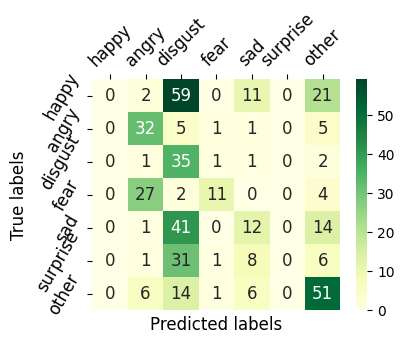

In [ ]:
for i,m in enumerate(model_names):
  plt.pause(0.2)
  con_mat(results['Actual'],results[model_names[i]],m)